<a href="https://colab.research.google.com/github/sreeja-01p/SSP-2/blob/main/SSP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SELF STUDY PROJECT II
### BY SREEJA POTTABATHULA - 100521735046

## EXPLORATORY DATA ANALYSIS (EDA) AND STATISTICAL ANALYSIS ON DIABETES DATASET

#### 1. Introduction
##### This project aims to analyze the Pima Indian Diabetes dataset using Exploratory Data Analysis (EDA) and Machine Learning.
##### The objective is to predict diabetes occurrence based on various medical indicators using K-Nearest Neighbors (KNN).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from google.colab import files

In [2]:
uploaded = files.upload()
diabetes_data = pd.read_csv('preprocessed_diabetes_data (1).csv')

Saving preprocessed_diabetes_data (1).csv to preprocessed_diabetes_data (1).csv


In [3]:
#view top 10 rows of the dataset
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


In [4]:
diabetes_data.shape

(768, 9)

#### 2. Data Exploration
##### Checking summary statistics, missing values, and class distribution.

In [5]:
#getting the details of each column
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [6]:
print("Missing values:")
print(diabetes_data.isnull().sum())

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


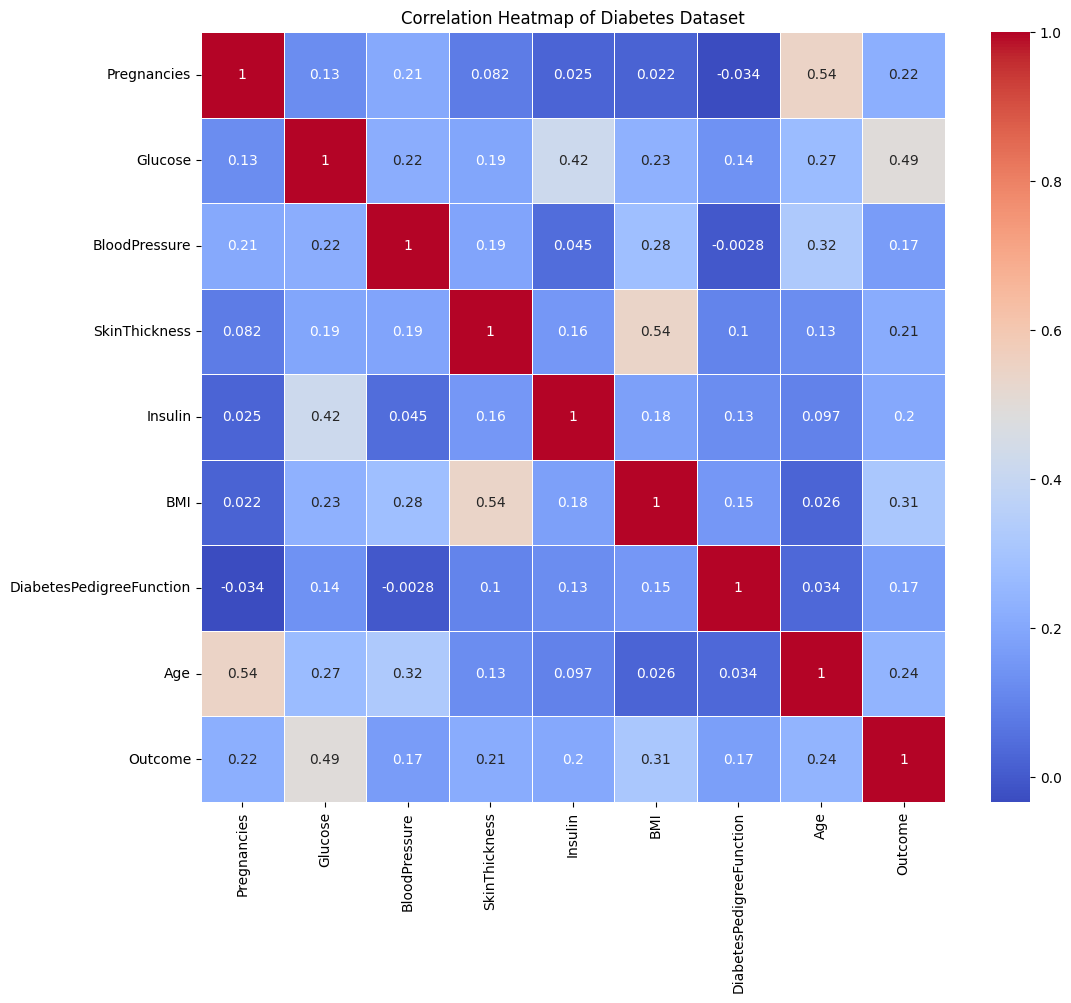

In [7]:
#correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

<ipython-input-8-d49a0fadc6b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes_data, palette='bright')


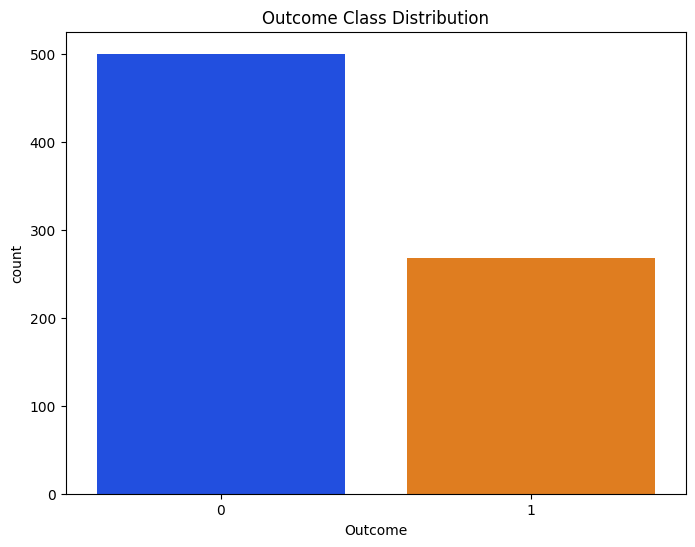

In [8]:
#countplot for class balance
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=diabetes_data, palette='bright')
plt.title("Outcome Class Distribution")
plt.show()

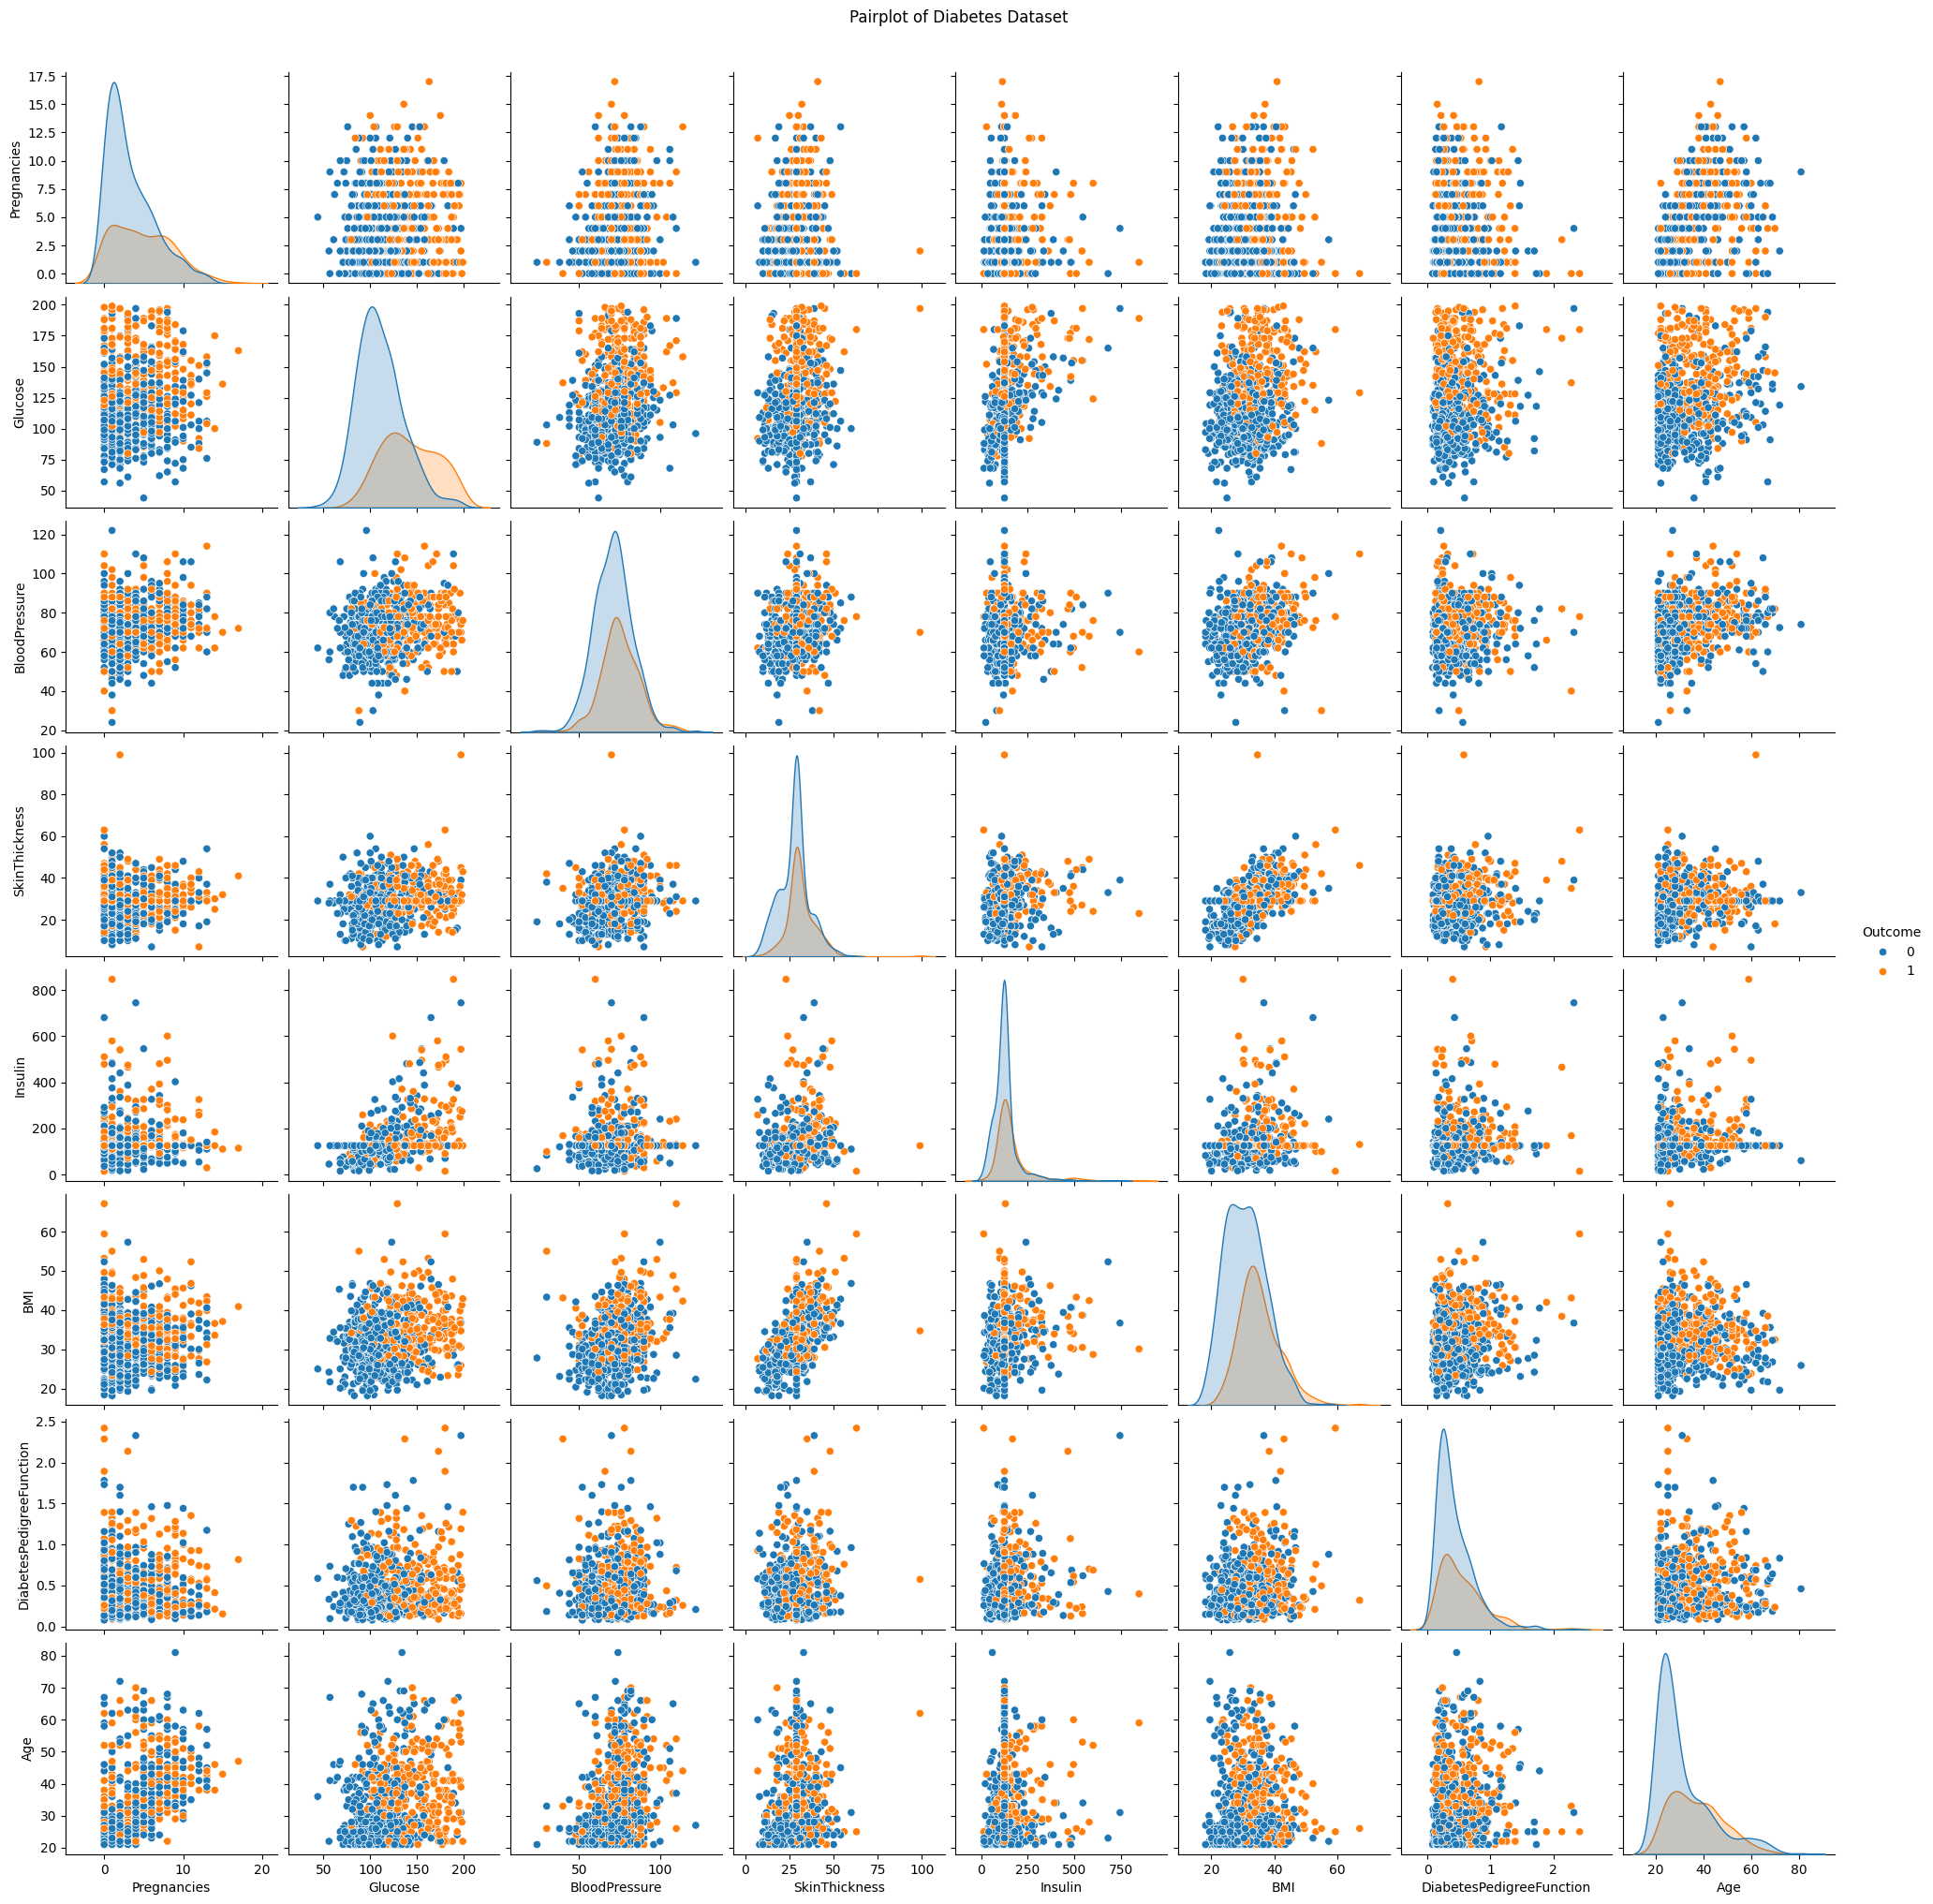

In [9]:
#pairplot to show relationships among features
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot of Diabetes Dataset', y=1.02)
plt.show()

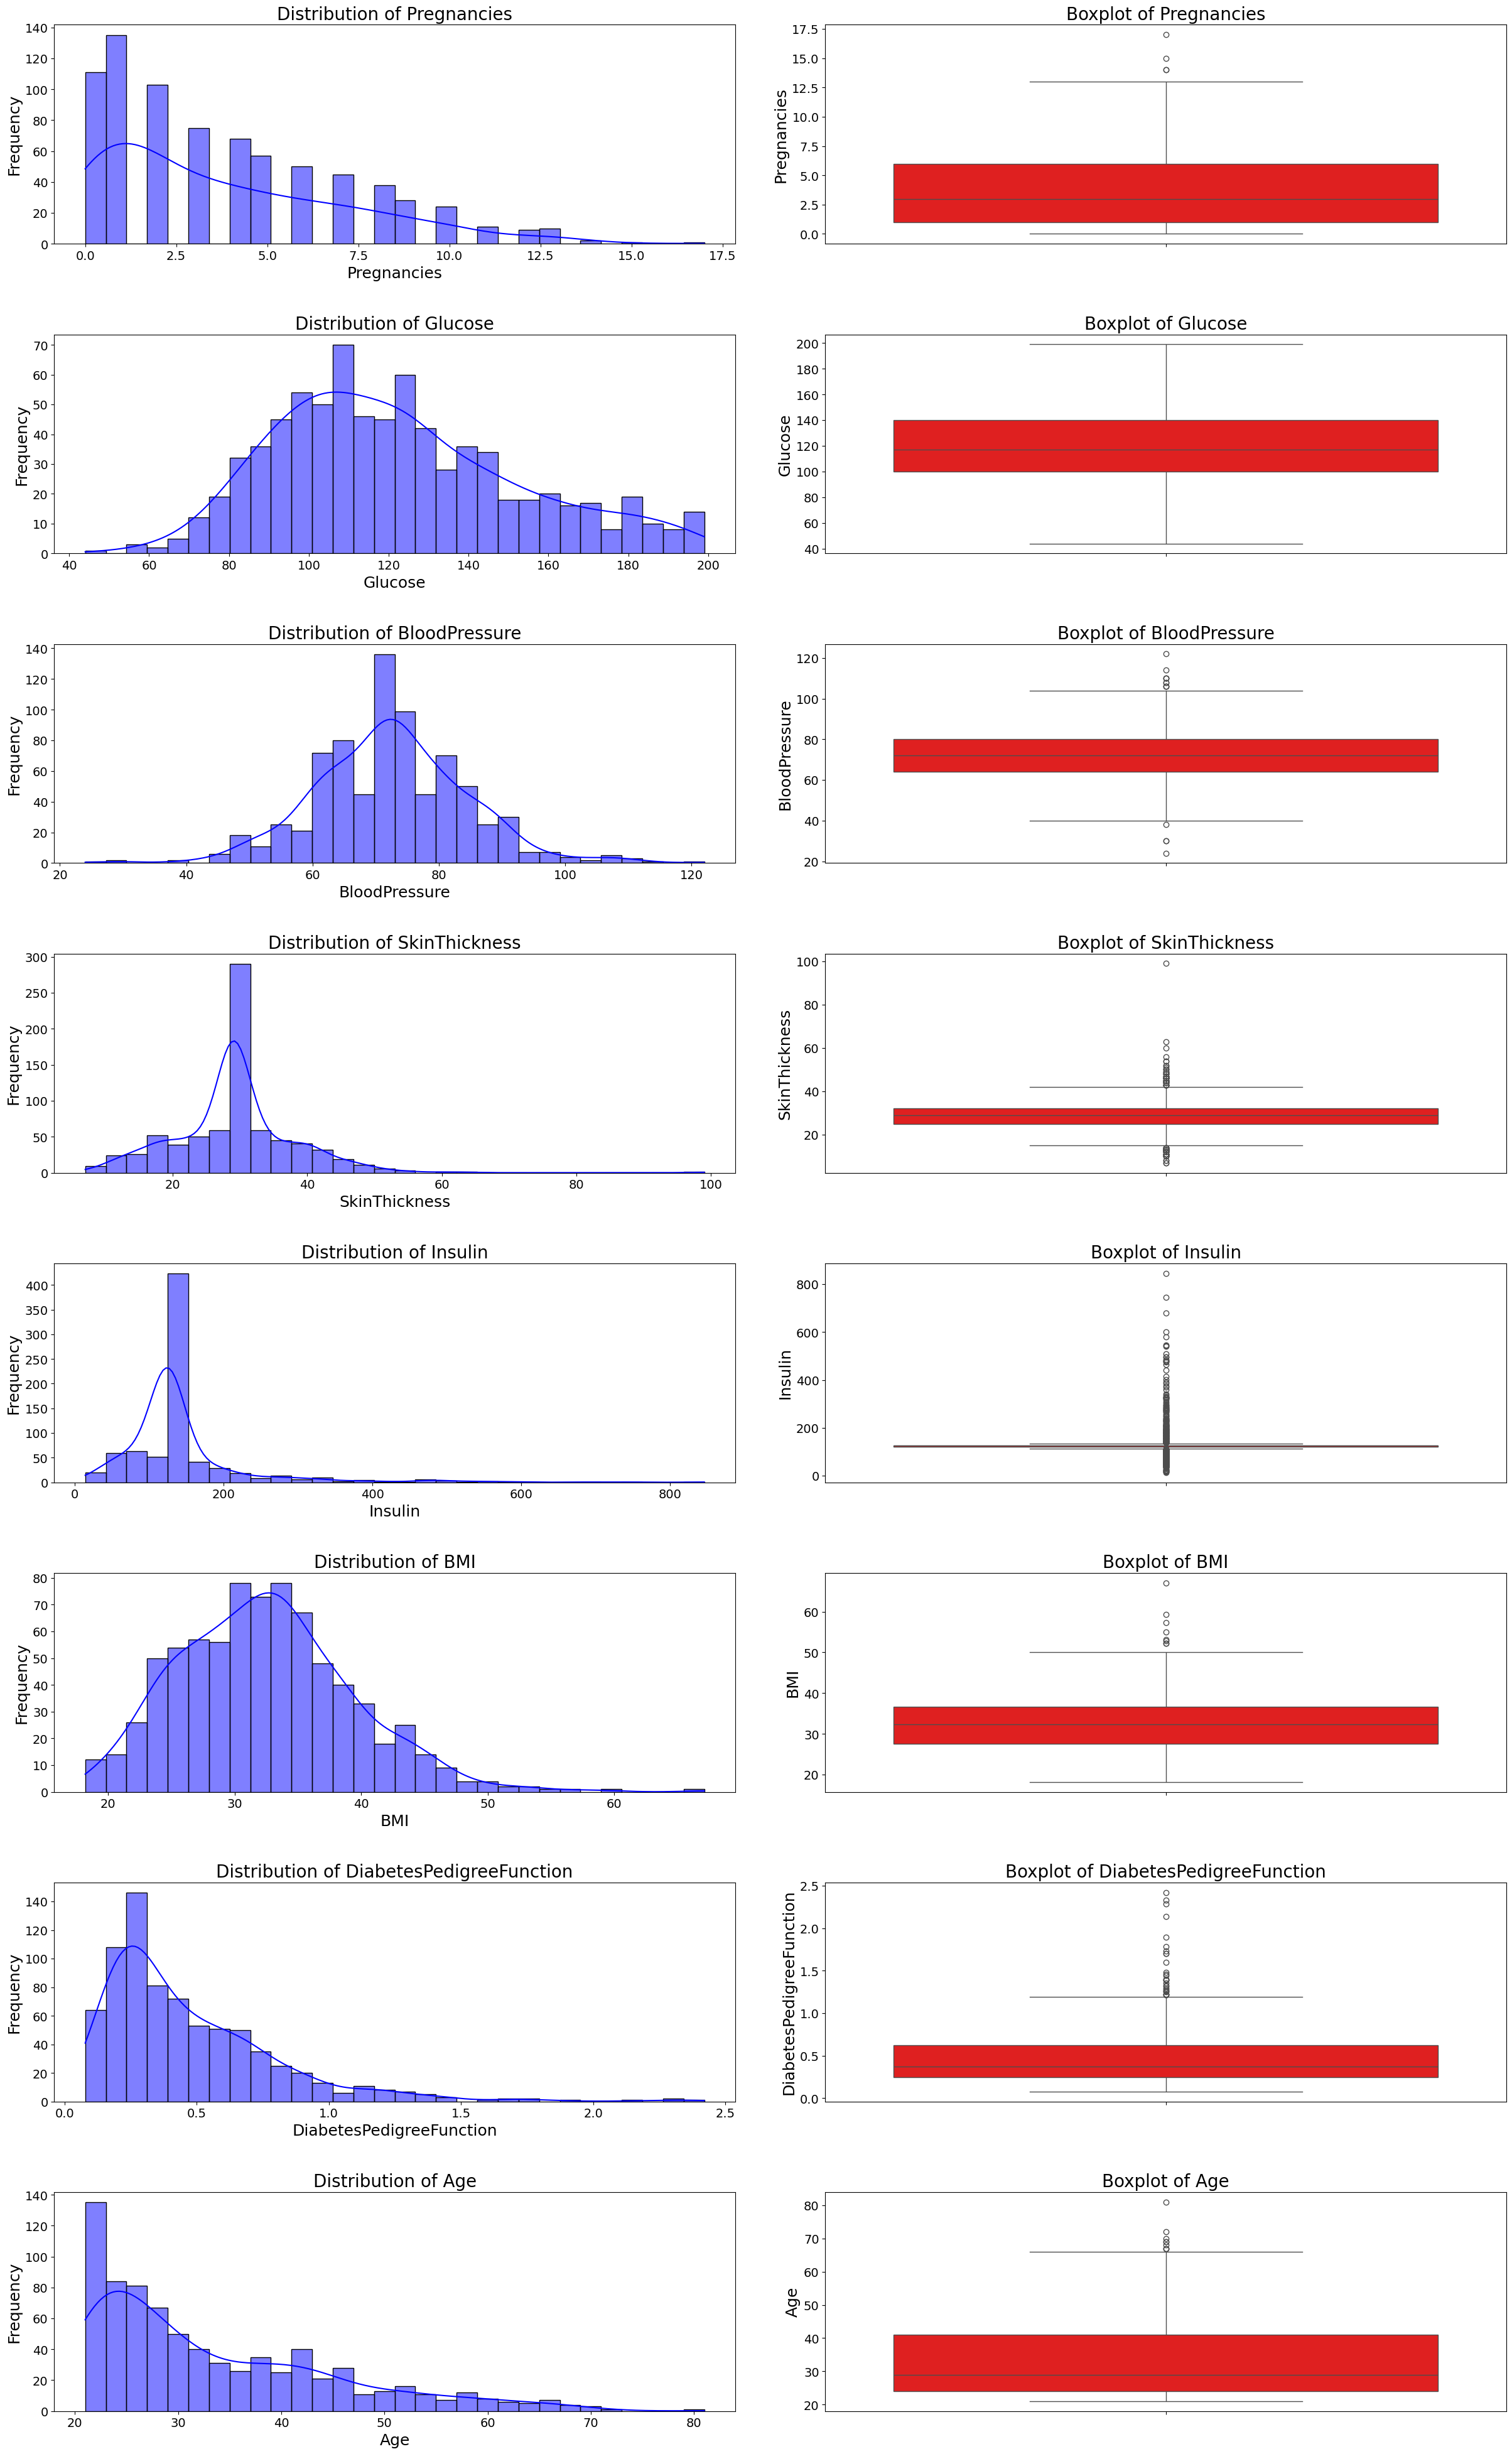

In [10]:
#boxplots and distributions for all features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(25, 40))

for i, feature in enumerate(features):
    plt.subplot(8, 2, 2*i + 1)
    sns.histplot(diabetes_data[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=20)
    plt.xlabel(feature, fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.subplot(8, 2, 2*i + 2)
    sns.boxplot(y=diabetes_data[feature], color='red')
    plt.title(f'Boxplot of {feature}', fontsize=20)
    plt.ylabel(feature, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout(pad=4)
plt.show()

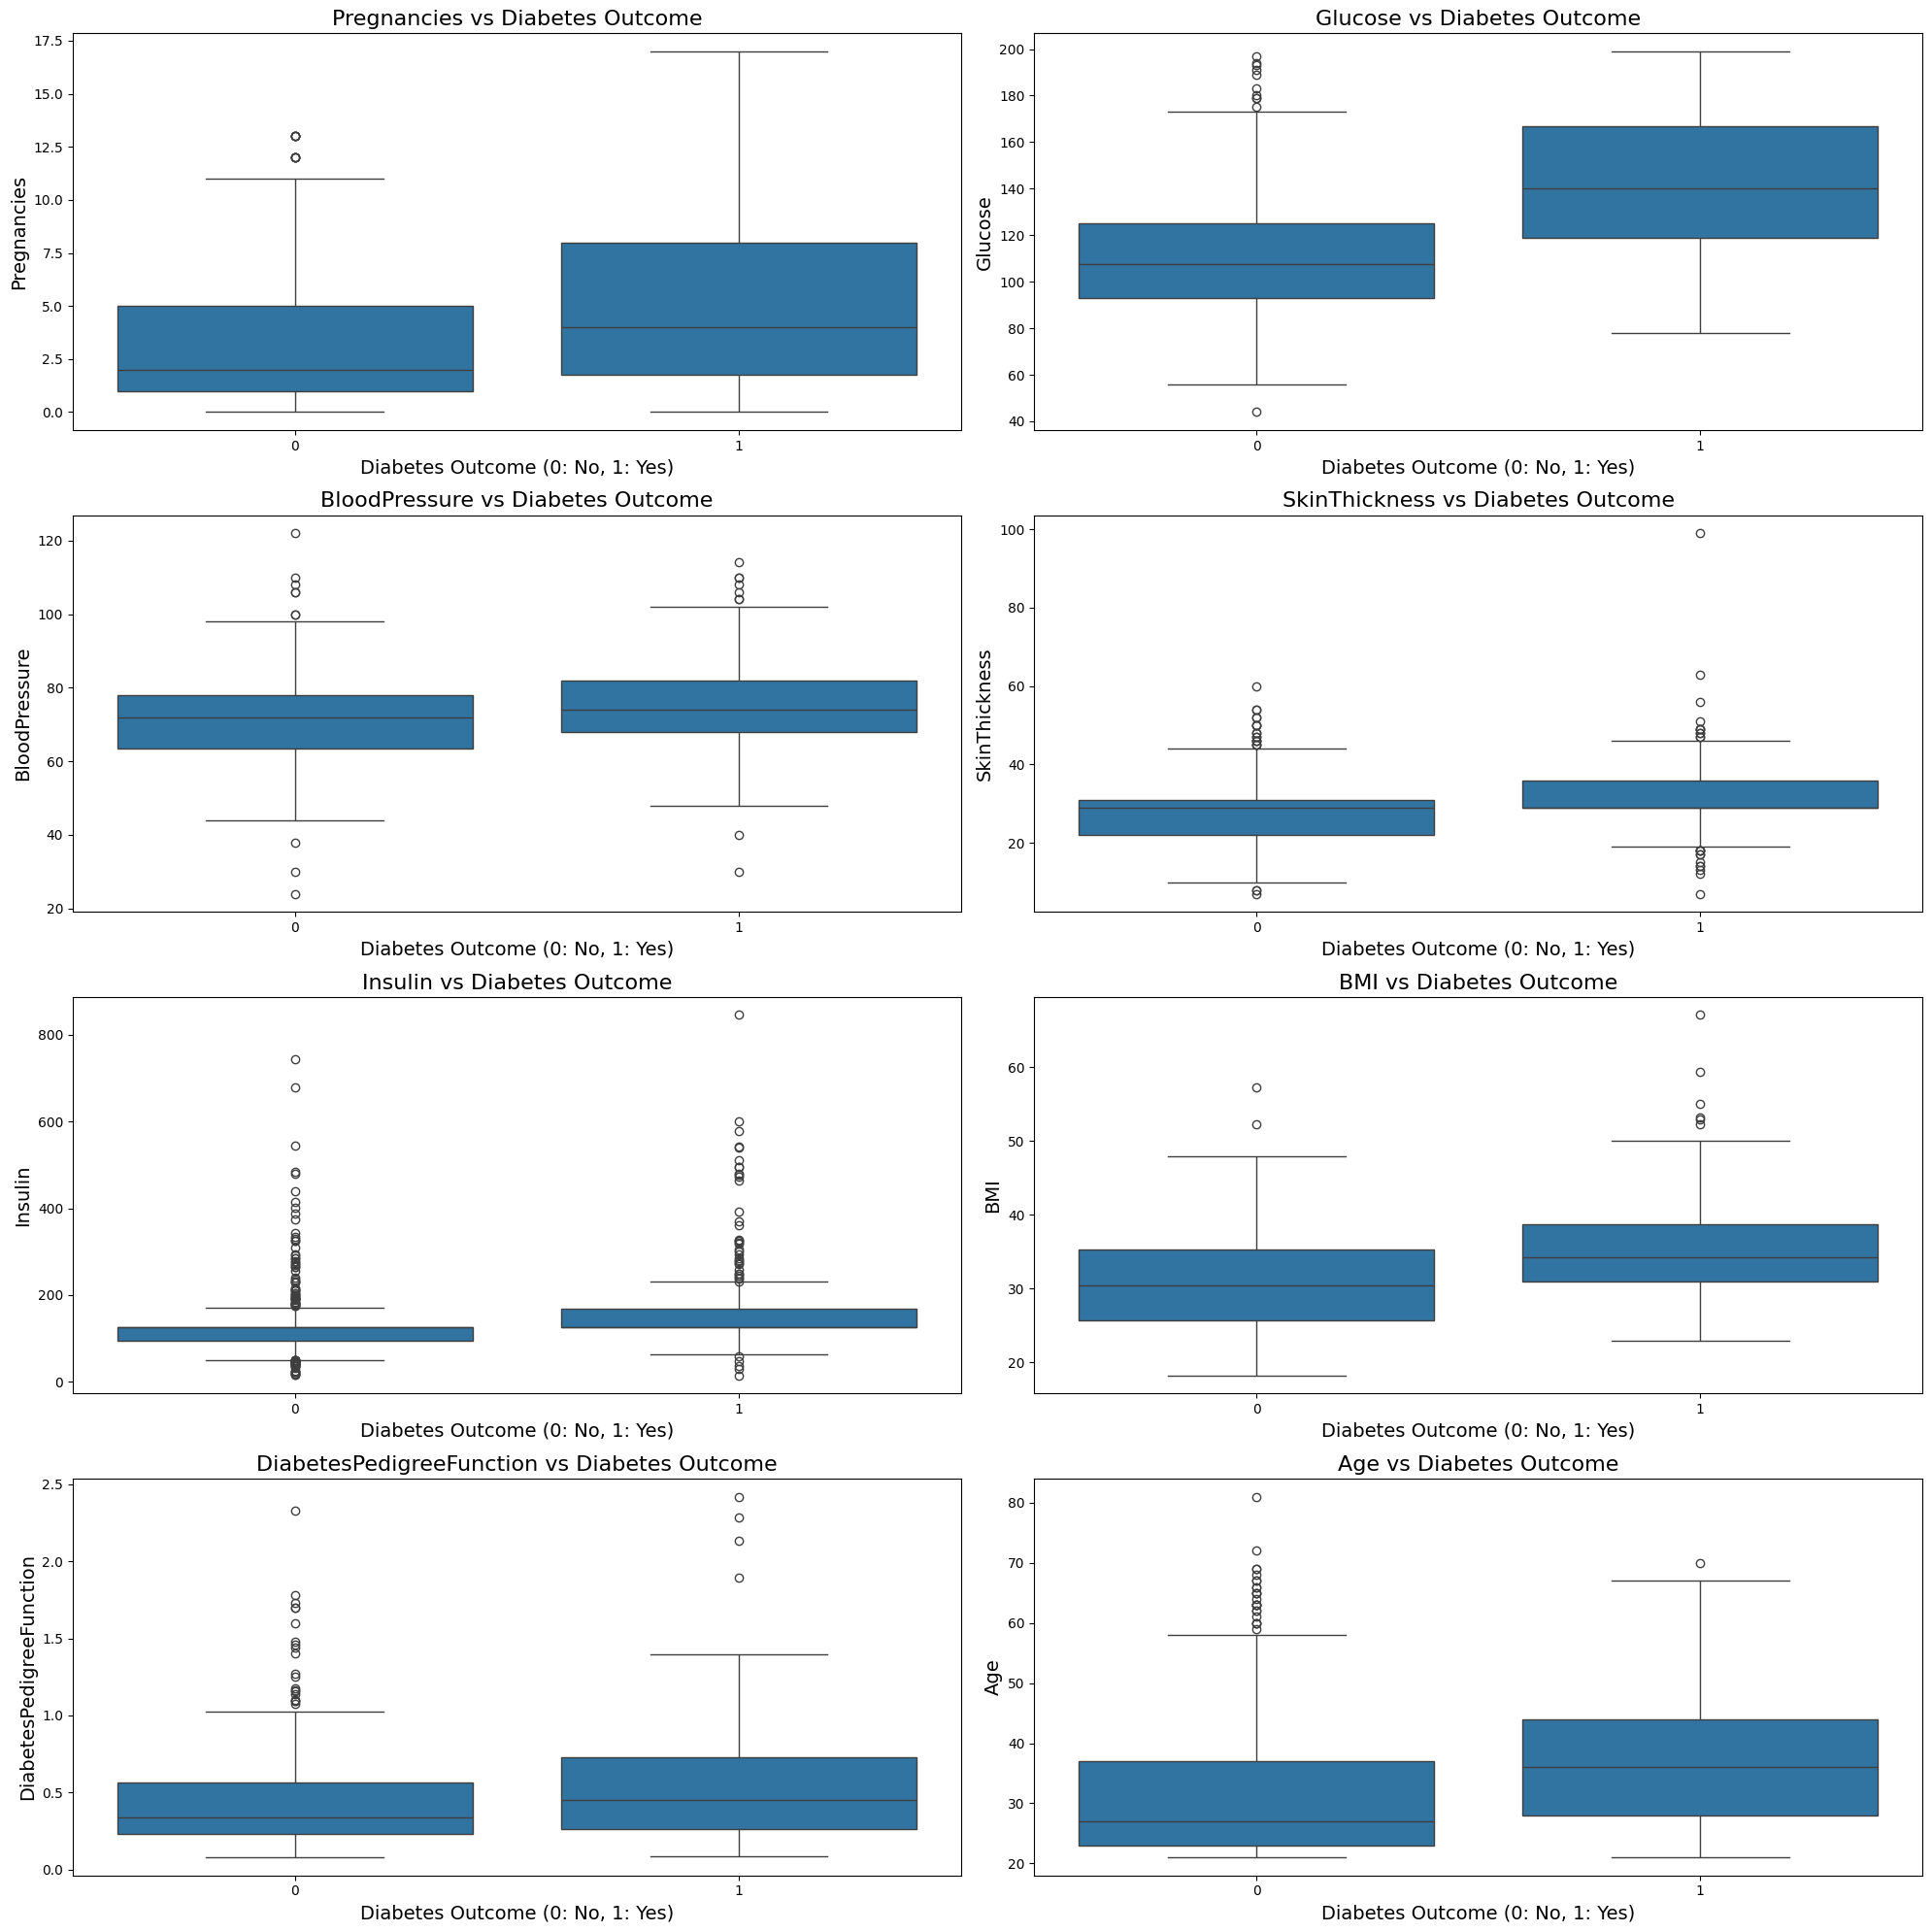

In [11]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(20, 20))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='Outcome', y=diabetes_data[feature], data=diabetes_data)
    plt.title(f'{feature} vs Diabetes Outcome', fontsize=16)
    plt.xlabel('Diabetes Outcome (0: No, 1: Yes)', fontsize=14)
    plt.ylabel(feature, fontsize=14)

plt.tight_layout()
plt.show()

#### 3. Feature Engineering
##### Scaling features for better model performance.

In [12]:
# Feature scaling
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 4. Model Implementation
##### Implementing K-Nearest Neighbors (KNN) and selecting the best K value.

In [14]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [15]:
#finding the best K using the elbow method
def plot_KNN_error_rate(X_train, X_test, y_train, y_test):
    error_rate = []
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(12,8))
    plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()

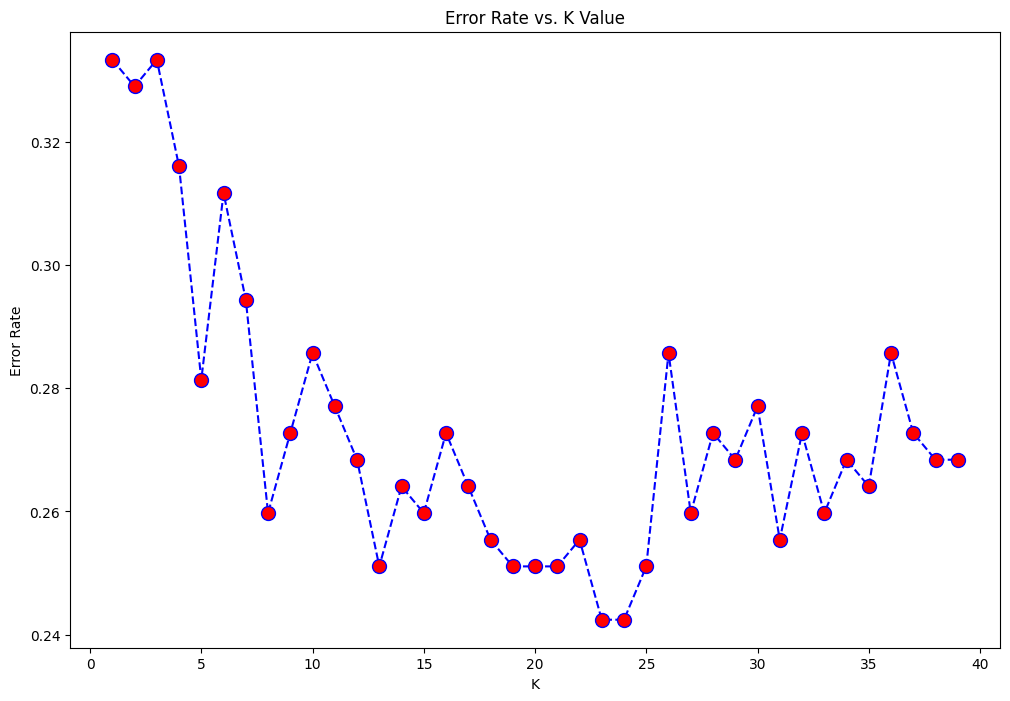

In [16]:
plot_KNN_error_rate(X_train, X_test, y_train, y_test)

#### 5. Model Evaluation
##### Finalizing model with best K value and evaluating accuracy.

In [17]:
best_k = 23  #from elbow method result
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f'Final Model Accuracy with K={best_k}: {accuracy * 100:.2f}%')

Final Model Accuracy with K=23: 75.76%


In [18]:
#cross-validation
cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean() * 100:.2f}%')

Cross-validation Accuracy: 76.57%


In [19]:
from sklearn.impute import SimpleImputer

In [20]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)

In [22]:
skewed_features = ['Insulin', 'DiabetesPedigreeFunction']
for col in skewed_features:
    min_val = X_df[col].min()
    if min_val <= 0:
        X_df[col] = np.log1p(X_df[col] - min_val + 1)
    else:
        X_df[col] = np.log1p(X_df[col])

In [23]:
imputer = SimpleImputer(strategy='mean')
X_cleaned = imputer.fit_transform(X_df)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.3, random_state=42)

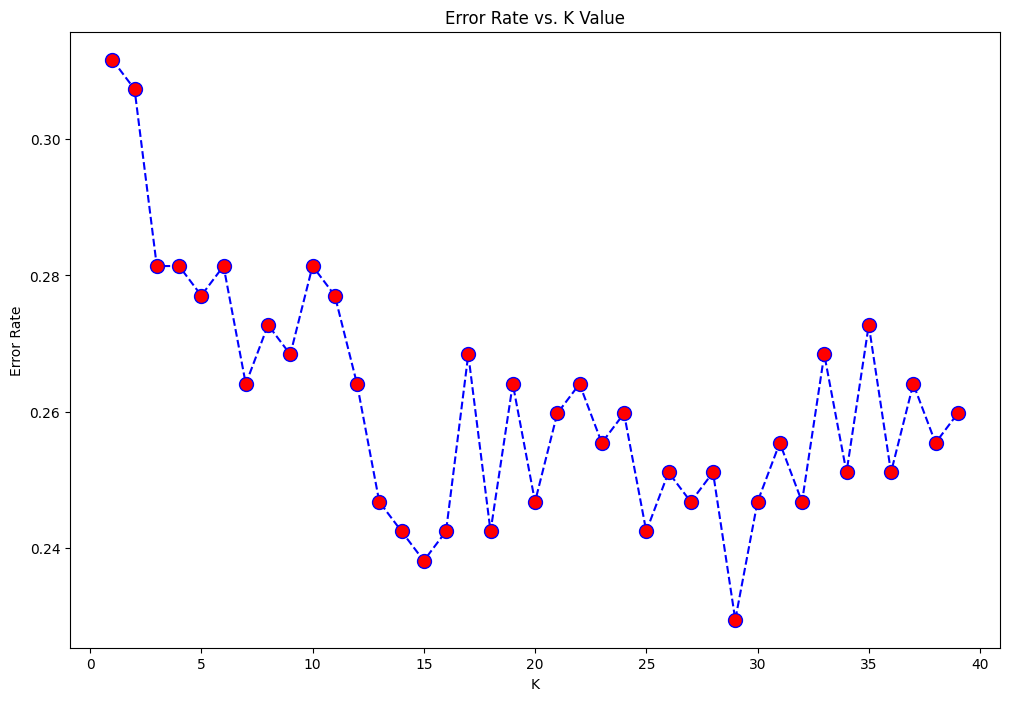

In [26]:
plot_KNN_error_rate(X_train, X_test, y_train, y_test)

In [27]:
best_k = 29
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print(f'Post-EDA Test Accuracy: {accuracy * 100:.2f}%')

Post-EDA Test Accuracy: 77.06%


#### 6. Visualization of Decision Boundaries
##### Using PCA to reduce dimensions and visualize decision boundaries.

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_pca, y)

KNeighborsClassifier(n_neighbors=29)

In [29]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

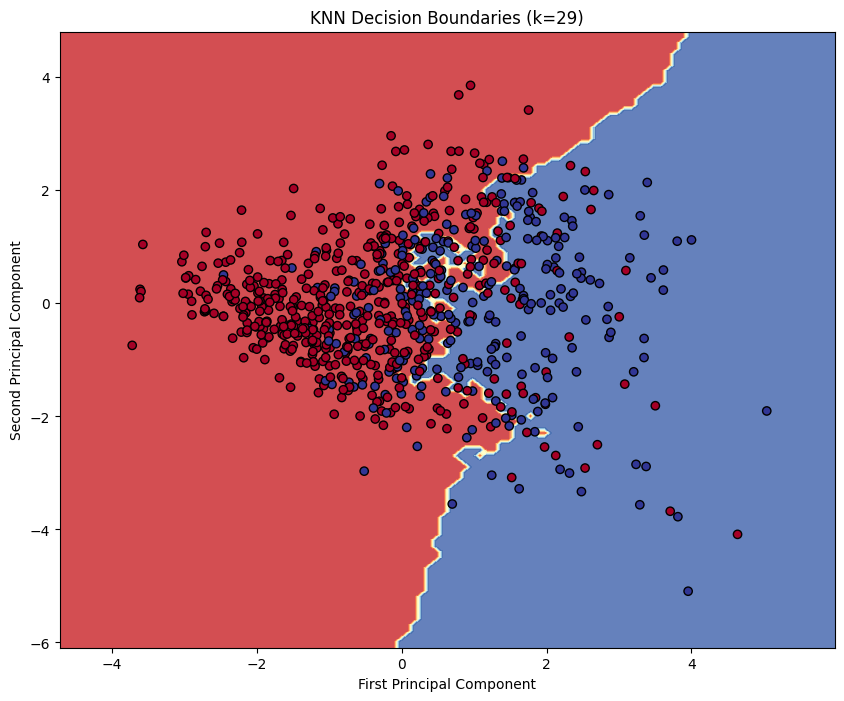

In [30]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.title(f'KNN Decision Boundaries (k={best_k})')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#### 7. Conclusion
##### - The study successfully applied EDA and machine learning techniques to predict diabetes.
##### - Feature scaling and optimal K selection significantly improved model accuracy.
##### - Future work could explore deep learning models or additional feature engineering.